In [125]:
import numpy as np 
import pandas as pd
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import ShuffleSplit

In [192]:
data_arr = np.loadtxt('housing.csv')


In [193]:
data = data_arr[:,0:-1]
target = data_arr[:,-1]

In [194]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [195]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [196]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [197]:
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
        
          
        # weight initialization
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :
             
        Y_pred = self.predict( self.X )
          
        # calculate gradients  
      
        dW =  -2*(( self.X.T ).dot( self.Y - Y_pred )  )/ self.m
       
        db =  -2*np.sum( self.Y - Y_pred ) / self.m 
        #print(dW)
        #print(db)
          
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
        
      
        return X.dot( self.W ) + self.b

In [198]:
def cost_function(y_pred,y):
    m = y.shape[0]
    return (1/(2*m))*np.sum((y_pred-y)**2)

In [199]:
def test_hypothesis(X,y):
    X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=0)
    rate = 0.03
    it = 1000
    cost_cv = []
    cost_train = []
    reg2 = LinearRegression(learning_rate=rate, iterations=it)
    reg2.fit(X_train,y_train)
    y_predCV = reg2.predict(X_cv)
    y_pred_train=reg2.predict(X_train)
    cost_cv.append(cost_function(y_predCV,y_cv))
    cost_train.append(cost_function(y_pred_train,y_train))
            

    return cost_cv, cost_train

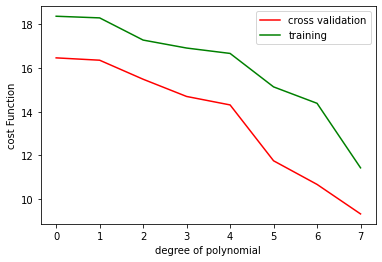

In [200]:
#tetsing all hypotheses
cost_cv = []
cost_train = []
for i in range(8):
    x_h = X[:,0:i+6]
    c,t = test_hypothesis(x_h,Y)
    cost_cv.append(c)
    cost_train.append(t)

plt.figure()
plt.plot(cost_cv,'r')
plt.plot(cost_train,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation','training'],loc='upper right')


## so obviously the best hypothesis is selecting all features 

In [201]:
reg2 = LinearRegression(learning_rate=0.03, iterations=1000)
reg2.fit(X,Y)
y_pred = reg2.predict(X_test)

print(f'Generaliztion error fot test set is {cost_function(y_pred,y_test)}')

Generaliztion error fot test set is 19.329075754023503


In [202]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [203]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [204]:
cv_errs = []
t_errs = []
degree = [1,2,3,4,5]
for i in degree:
    linear_regression = make_pipeline(PolynomialFeatures(degree=i), MinMaxScaler(),
                                  LinearRegression())
    cv = ShuffleSplit(n_splits=10, random_state=1)
    cv_results = cross_validate(linear_regression, X, Y,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
    train_error = (-cv_results["train_score"])
    test_error = (-cv_results["test_score"])
    print(f'Plonomial of degree {i}')
    print(f"Mean squared error of linear regression model on the train set:\n"
        f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
    print(f"Mean squared error of linear regression model on the test set:\n"
        f"{test_error.mean():.3f} +/- {test_error.std():.3f}")
    cv_errs.append(test_error.mean())
    t_errs.append(train_error.mean())

Plonomial of degree 1
Mean squared error of linear regression model on the train set:
19.487 +/- 0.504
Mean squared error of linear regression model on the test set:
19.090 +/- 4.626
Plonomial of degree 2
Mean squared error of linear regression model on the train set:
10.551 +/- 14.134
Mean squared error of linear regression model on the test set:
32.400 +/- 48.679
Plonomial of degree 3
Mean squared error of linear regression model on the train set:
0.000 +/- 0.000
Mean squared error of linear regression model on the test set:
7413.083 +/- 6406.718
Plonomial of degree 4
Mean squared error of linear regression model on the train set:
0.000 +/- 0.000
Mean squared error of linear regression model on the test set:
1116.977 +/- 803.499
Plonomial of degree 5
Mean squared error of linear regression model on the train set:
0.000 +/- 0.000
Mean squared error of linear regression model on the test set:
694.213 +/- 441.169


In [205]:
cv_errs

[19.08962414830131,
 32.4004540420373,
 7413.083433461116,
 1116.9770656499963,
 694.2134232482865]

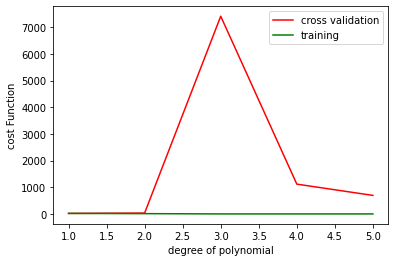

In [206]:
plt.figure()
plt.plot(degree,cv_errs,'r')
plt.plot(degree,t_errs,'g')
plt.ylabel(f'cost Function')
plt.xlabel('degree of polynomial')
plt.legend(['cross validation','training'],loc='upper right')

## Polynomial of degree 2 is the best choice

In [207]:
linear_regression = make_pipeline(PolynomialFeatures(degree=2), MinMaxScaler(),LinearRegression())
cv = ShuffleSplit(n_splits=10, random_state=1)
cv_results = cross_validate(linear_regression, data, target, cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [208]:
train_error = (-cv_results["train_score"])
test_error = (-cv_results["test_score"])
print(f'Plonomial of degree 2')
print(f"Mean squared error of linear regression model on the train set:\n"
        f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
print(f"Mean squared error of linear regression model on the test set:\n"
        f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Plonomial of degree 2
Mean squared error of linear regression model on the train set:
7.514 +/- 5.138
Mean squared error of linear regression model on the test set:
18.901 +/- 21.792


In [209]:
model_first_fold = cv_results["estimator"][0]
model_first_fold[0].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4',
       'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11',
       'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6',
       'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2',
       'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9',
       'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6',
       'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2',
       'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11',
       'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10',
       'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10',
       'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11',
       'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2',
       'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12',


In [210]:
from sklearn.model_selection import train_test_split
X, X_test, Y, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [211]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))


In [212]:

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, X, Y,cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [213]:
alphas

array([0.01      , 0.01274275, 0.01623777, 0.02069138, 0.02636651,
       0.03359818, 0.04281332, 0.05455595, 0.06951928, 0.08858668,
       0.11288379, 0.14384499, 0.18329807, 0.23357215, 0.29763514,
       0.37926902, 0.48329302, 0.61584821, 0.78475997, 1.        ])

In [214]:
mse_alphas = [est[-1].cv_values_.mean(axis=0) for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

,0.010000,0.012743,0.016238,0.020691,0.026367,0.033598,0.042813,0.054556,0.069519,0.088587,0.112884,0.143845,0.183298,0.233572,0.297635,0.379269,0.483293,0.615848,0.784760,1.000000
0,15.615107,15.389828,15.139130,14.864672,14.569698,14.259159,13.939659,13.619125,13.306151,13.009100,12.735148,12.489556,12.275377,12.093682,11.944156,11.825835,11.737713,11.679025,11.649198,11.647577
1,17.297724,17.021819,16.701358,16.337136,15.933251,15.497377,15.040454,14.575745,14.117373,13.678649,13.270629,12.901255,12.575268,12.294786,12.060233,11.871209,11.727032,11.626812,11.569199,11.552051
2,17.661739,17.479634,17.250391,16.970649,16.640357,16.263493,15.848283,15.406773,14.953716,14.504940,14.075534,13.678261,13.322522,13.014029,12.755123,12.545502,12.383098,12.264847,12.187212,12.146485
3,15.936173,15.795304,15.625829,15.425740,15.194583,14.933883,14.647427,14.341317,14.023696,13.704146,13.392848,13.099684,12.833464,12.601402,12.408844,12.259188,12.153878,12.092445,12.072610,12.090546
4,16.181165,16.030930,15.848244,15.629963,15.374734,15.083619,14.760488,14.412084,14.047683,13.678371,13.316059,12.972420,12.657952,12.381345,12.149155,11.965729,11.833219,11.751598,11.718684,11.730306


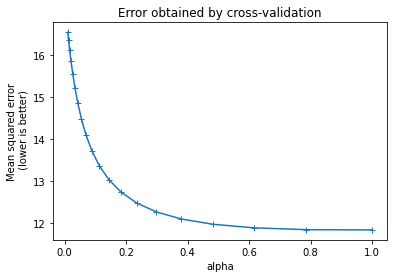

In [215]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [216]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[1.0, 1.0, 1.0, 0.7847599703514611, 0.7847599703514611]

In [217]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} +/- {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.91 +/- 0.11


In [218]:
ridge = make_pipeline(PolynomialFeatures(degree=2), MinMaxScaler(),
                      Ridge(alpha=0.9))
cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")
                        

Mean squared error of linear regression model on the train set:
12.917 +/- 0.169
Mean squared error of linear regression model on the test set:
10.370 +/- 1.881
